# Q3
In the previous question we observed some redundancy in the features. We would like to try some feature selection heuristic in this question. Consider the same dataset as question 2 (fat.csv), where **brozek** is the response variable and the other 17 columns are the model features. Follow this steps below.<br>

– Form an extended version of the dataset, by appending two more columns. One column corresponding to $siri^2$ and one column corresponding to $\frac{1}{density}$. Your extended dataset should now have 20 columns, where the first column is brozek and used as the response variable, 17 columns identical to the original fat.csv data set, and columns 19 and 20 with the values $siri^2$ and $\frac{1}{density}$, respectively. density
We will refer to this dataset as the *extended dataset*.

– In a similar way as question 2, split the extended dataset into two sets. Set 1 includes the first 200 rows of the data (do not count the row associated with the feature/response names), and set 2, which includes the last 52 rows of the data. Name the first set **train** and the second set **test**.

In [9]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [21]:
Fat = pd.read_csv("fat.csv")
train,test = np.split(Fat,[int(200)])
y = train['brozek']

In [29]:
X_full = pd.DataFrame({'intercept': np.ones(train.shape[0]),
                  'siri':         train['siri'],
                  'density':      train['density'],
                  'age':          train['age'],
                  'weight':       train['weight'],
                  'height':       train['height'],
                  'adipos':       train['adipos'],
                  'free':         train['free'],
                  'neck':         train['neck'],
                  'chest':        train['chest'],
                  'abdom':        train['abdom'],
                  'hip':          train['hip'],
                  'thigh':        train['thigh'],
                  'knee':         train['knee'],
                  'ankle':        train['ankle'],
                  'biceps':       train['biceps'],
                  'forearm':      train['forearm'],
                  'wrist':        train['wrist'],
                  'siri_squared': train['siri'] ** 2,
                  'inv_density':   1/train['density']})
print(X_full)

     intercept  siri  density  age  weight  height  adipos   free  neck  \
0          1.0  12.3   1.0708   23  154.25   67.75    23.7  134.9  36.2   
1          1.0   6.1   1.0853   22  173.25   72.25    23.4  161.3  38.5   
2          1.0  25.3   1.0414   22  154.00   66.25    24.7  116.0  34.0   
3          1.0  10.4   1.0751   26  184.75   72.25    24.9  164.7  37.4   
4          1.0  28.7   1.0340   24  184.25   71.25    25.6  133.1  34.4   
..         ...   ...      ...  ...     ...     ...     ...    ...   ...   
195        1.0  25.5   1.0411   42  180.00   68.25    27.2  135.4  38.5   
196        1.0  22.0   1.0488   42  156.25   69.00    23.1  122.6  35.5   
197        1.0  17.7   1.0583   42  168.00   71.50    23.1  138.4  36.5   
198        1.0   6.6   1.0841   42  167.25   72.75    22.3  155.1  37.6   
199        1.0  23.6   1.0462   43  170.75   67.50    26.4  132.1  37.4   

     chest  abdom    hip  thigh  knee  ankle  biceps  forearm  wrist  \
0     93.1   85.2   94.5   

#### (a) Use the training data to fit a model of the following form <br>brozek = $\beta_0$ + $\beta_1$ siri + ... + $\beta_{17}$ wrist + $\beta_{18}$ $siri^2$ + $\beta_{19}$ $\frac{1}{density}$ <br>report the fitted parameters, the 95% confidence interval for each estimated parameter and the p-values. What is the R2 value?

In [30]:
fullFittedModel = sm.OLS(y, X_full).fit()
fullFittedModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.703e+04
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          6.09e-282
Time:                        13:42:34   Log-Likelihood:                 64.717
No. Observations:                 200   AIC:                            -89.43
Df Residuals:                     180   BIC:                            -23.47
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     -950.8057    580.610     -1.638      0.103   -2096.483     194.871
siri             0.9305      0.029     32.063      0.000       0.873       0.988
density        436.7337    269.081      1.623      0.106     -94.225     967.693
age             -0.0007      0.002     -0.414      0.680      -0.004       0.003
weight           0.0162      0.006      2.809      0.006       0.005       0.028
height          -0.0005      0.005     -0.096      0.924      -0.010       0.009
adipos          -0.0235      0.016     -1.505      0.134      -0.054       0.007
free            -0.0204      0.007     -2.780      0.006      -0.035      -0.006
neck            -0.0018      0.011     -0.163      0.870      -0.024       0.020
chest            0.0056      0.005      1.026      0.306      -0.005       0.016
abdom           -0.0006      0.005     -0.109      0.913      -0.011       0.010
hip              0.0008      0.008      0.106      0.916      -0.014       0.016
thigh            0.0174      0.008      2.264      0.025       0.002       0.033
knee            -0.0290      0.013     -2.296      0.023      -0.054      -0.004
ankle            0.0061      0.010      0.591      0.555      -0.014       0.026
biceps          -0.0169      0.008     -2.011      0.046      -0.034      -0.000
forearm          0.0219      0.010      2.110      0.036       0.001       0.042
wrist            0.0343      0.027      1.270      0.206      -0.019       0.088
siri_squared    -0.0026      0.001     -1.956      0.052      -0.005    2.26e-05
inv_density    518.6225    312.993      1.657      0.099     -98.985    1136.230
==============================================================================
Omnibus:                       98.592   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6766.061
Skew:                           0.902   Prob(JB):                         0.00
Kurtosis:                      31.437   Cond. No.                     3.19e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### (b) Use the test data to calculate the test error (similar to the formulation in part (c) of the previous question), and call it $e_{full}$.

In [31]:
X_test_full = pd.DataFrame({'intercept': np.ones(test.shape[0]),
                  'siri':    test['siri'],
                  'density': test['density'],
                  'age':     test['age'],
                  'weight':  test['weight'],
                  'height':  test['height'],
                  'adipos':  test['adipos'],
                  'free':    test['free'],
                  'neck':    test['neck'],
                  'chest':   test['chest'],
                  'abdom':   test['abdom'],
                  'hip':     test['hip'],
                  'thigh':   test['thigh'],
                  'knee':    test['knee'],
                  'ankle':   test['ankle'],
                  'biceps':  test['biceps'],
                  'forearm': test['forearm'],
                  'wrist':   test['wrist'],
                  'siri_squared': test['siri'] ** 2,
                  'inv_density':   1/test['density']})
print(X_test_full)

     intercept  siri  density  age  weight  height  adipos   free  neck  \
200        1.0  12.2   1.0709   43  178.25   70.25    25.4  155.9  37.8   
201        1.0  22.1   1.0484   43  150.00   69.25    22.0  117.5  35.2   
202        1.0  28.7   1.0340   43  200.50   71.50    27.6  144.9  37.9   
203        1.0   6.0   1.0854   44  184.00   74.00    23.7  171.4  37.9   
204        1.0  34.8   1.0209   44  223.00   69.75    32.3  148.5  40.9   
205        1.0  16.6   1.0610   44  208.75   73.00    27.6  174.2  41.9   
206        1.0  32.9   1.0250   44  166.00   65.50    27.2  113.5  39.1   
207        1.0  32.8   1.0254   47  195.00   72.50    26.1  133.6  40.2   
208        1.0   9.6   1.0771   47  160.50   70.25    22.9  144.3  36.0   
209        1.0  10.8   1.0742   47  159.75   70.75    22.5  141.8  34.5   
210        1.0   7.1   1.0829   49  140.50   68.00    21.4  129.5  35.8   
211        1.0  27.2   1.0373   49  216.25   74.50    27.4  159.3  40.2   
212        1.0  19.5   1.

In [32]:
# the actual value from test dataset
y_actual = test['brozek'].values

# the value predicted by the first model
y_pred_full = fullFittedModel.predict(X_test_full)

y_actual = np.array(y_actual)
y_pred_full = np.array(y_pred_full)

e1 = np.sqrt(sum(np.square(y_actual - y_pred_full)))
print('Prediction Error e1 =', e1)

Prediction Error e1 = 0.8565466791992765


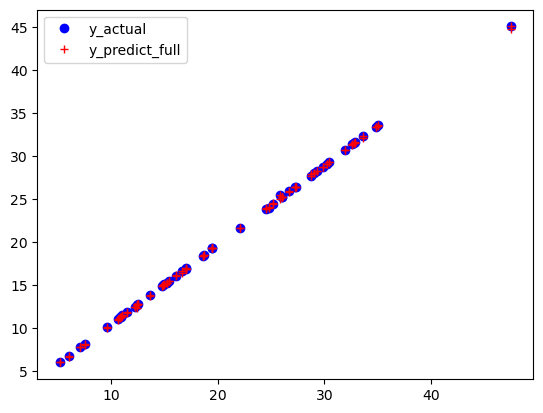

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(test['siri'], y_actual, "bo", label="y_actual")
ax.plot(np.hstack((test['siri'], X_test_full['siri'])), np.hstack((y_actual, y_pred_full)), "r+", label="y_predict_full")
ax.legend(loc="best")

#### (d) Now consider a second model which uses the features indicated in part (a), with the only difference that density is replaced by inverse density. Repeat the steps in part (a) and report the values.


In [ ]:
X_second = pd.DataFrame({'intercept': np.ones(train.shape[0]),
                  'siri':    train['siri'],
                  'density': 1/train['density'],
                  'age':     train['age'],
                  'weight':  train['weight'],
                  'height':  train['height'],
                  'adipos':  train['adipos'],
                  'free':    train['free'],
                  'neck':    train['neck'],
                  'chest':   train['chest'],
                  'abdom':   train['abdom'],
                  'hip':     train['hip'],
                  'thigh':   train['thigh'],
                  'knee':    train['knee'],
                  'ankle':   train['ankle'],
                  'biceps':  train['biceps'],
                  'forearm': train['forearm'],
                  'wrist':   train['wrist']})
# print(X_second)

In [ ]:
secondFittedModel = sm.OLS(y, X_second).fit()
secondFittedModel.summary()

In [ ]:
# the value predicted by the second model
y_pred_second = np.array(secondFittedModel.predict(X_test_full))
e2 = np.sqrt(sum(np.square(y_actual - y_predict_second)))
print('Second Prediction Error e2 =', e2)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(test['siri'], y_actual, "bo", label="y_actual")
ax.plot(np.hstack((test['siri'], X_test['siri'])), np.hstack((y_actual, y_pred_second)), "r+", label="y_predict_2nd")
ax.legend(loc="best")

In [ ]:
X_third = pd.DataFrame({'intercept': np.ones(train.shape[0]),
                  'siri':        train['siri'],
                  'siri_square': train['siri'] ** 2,
                  'inv_density': 1/train['density'],
                  'density':     train['density']})
# print(X_third)
thirdFittedModel = sm.OLS(y, X_third).fit()
thirdFittedModel.summary()

#### (g) Based on α = 0.05 and the calculated p-values, which features seem problematic?

#### All the p-values of the features are less than 0.05
| feature | p-value |
| --- | --- |
| intercept | 0.023 |
| siri | 0.00 |
| $siri^2$ | 0.024 |
| $\frac{1}{density}$ | 0.022 |
| density | 0.024 |

#### (h) Repeat part (c) for this model and call the error e3.

In [ ]:
X_test_third = pd.DataFrame({'intercept': np.ones(test.shape[0]),
                  'siri':        test['siri'],
                  'siri_square': test['siri'] ** 2,
                  'inv_density': 1/test['density'],
                  'density':     test['density']})
# print(X_test_third)

# the value predicted by the third model
y_pred_third = np.array(thirdFittedModel.predict(X_test_third))
e3 = np.sqrt(sum(np.square(y_actual - y_pred_third)))
print('Third Prediction Error e3 =', e3)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(test['siri'], y_actual, "bo", label="y_actual")
ax.plot(np.hstack((test['siri'], X_test_third['siri'])), np.hstack((y_actual, y_pred_third)), "r+", label="y_predict_3rd")
ax.legend(loc="best")

#### (i) Based on the values e1, e2 and e3, and the model formulations, which model would you pick and why (state two reasons)?

#### All of these three models' R-squared and Adj. R-squared are the same and close to 1.<br>Therefore, I will pick the third model since the prediction error is the least and all the p-values are not over 0.05.